In [2]:
from io import IncrementalNewlineDecoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
fraud = pd.read_csv("/content/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


As observed no null values and column data types also matching with data, but for better model efficiency perfomance wise will convert all object data types into categorical.

In [5]:
#finding duplicate records
fraud[fraud.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


no duplicated rows in fraud Data.

In [6]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


by observing mean and median of workExp we can say its nearly normally distrbuted and no outliers as well.

In [7]:
# renaming the columns
fraud = fraud.rename(columns={"City.Population":"City_population","Work.Experience":"Work_experience","Marital.Status":"Marital_status"})
fraud.head()

,Undergrad,Marital_status,Taxable.Income,City_population,Work_experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


<ipython-input-8-e71e0313053f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['City_population'])


<Axes: xlabel='City_population', ylabel='Density'>

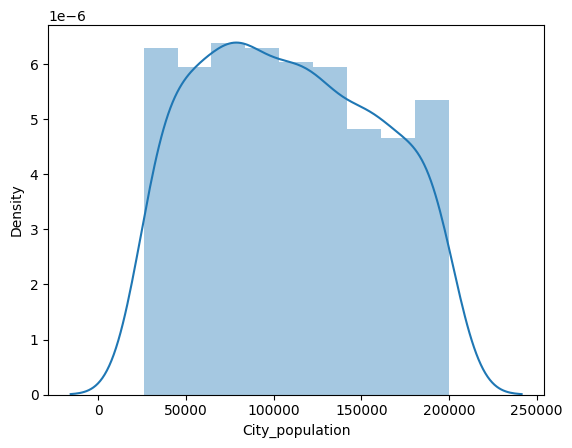

In [8]:
sns.distplot(fraud['City_population'])

Taxable.Income


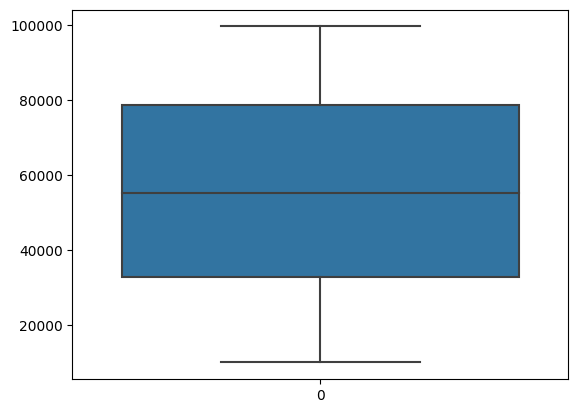

City_population


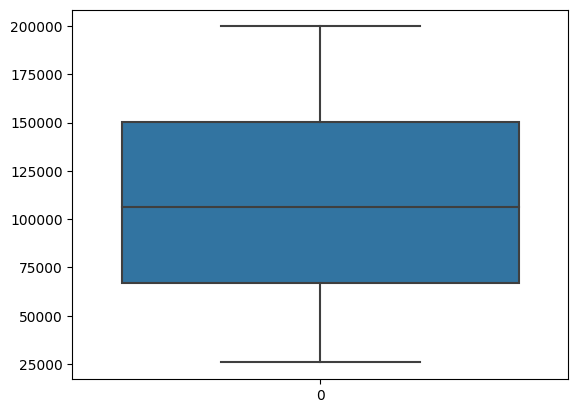

Work_experience


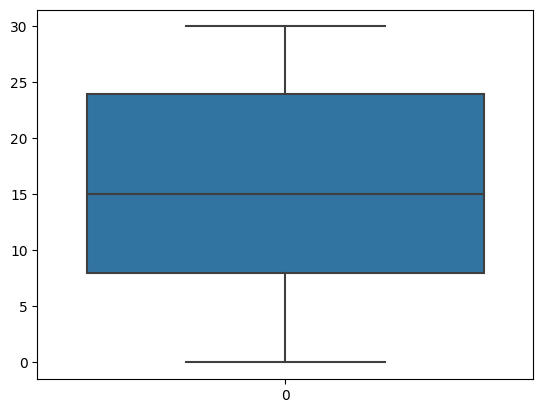

In [9]:
#finding outliers
for feature in fraud.columns:
  if fraud[feature].dtype == 'int64':
    print(feature)
    sns.boxplot(fraud[feature])
    plt.show()

observed no outliers, work experience of employees mostly in between 8 to 24.

In [10]:
fraud = fraud.rename(columns={"Taxable.Income":"Tax_income"})

In [11]:
fraud['income'] = fraud['Tax_income'].apply(lambda Tax_income: 'Risky' if Tax_income <= 30000 else 'Good')

In [12]:
fraud.head()

,Undergrad,Marital_status,Tax_income,City_population,Work_experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [13]:
fraud = fraud.drop('Tax_income', axis=1)

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_status   600 non-null    object
 2   City_population  600 non-null    int64 
 3   Work_experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   income           600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [15]:
#converting object datatype columns into categorcal
fraud['Undergrad'] = pd.Categorical(fraud['Undergrad'])
fraud['Marital_status'] = pd.Categorical(fraud['Marital_status'])
fraud['Urban'] = pd.Categorical(fraud['Urban'])
fraud['income'] = pd.Categorical(fraud['income'])

In [16]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Undergrad        600 non-null    category
 1   Marital_status   600 non-null    category
 2   City_population  600 non-null    int64   
 3   Work_experience  600 non-null    int64   
 4   Urban            600 non-null    category
 5   income           600 non-null    category
dtypes: category(4), int64(2)
memory usage: 12.3 KB


In [17]:
# converting categorical variabel into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for feature in fraud.columns:
  if fraud[feature].dtype == 'category':
    fraud[feature] = label.fit_transform(fraud[feature])

In [18]:
fraud.head()

,Undergrad,Marital_status,City_population,Work_experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [19]:
X = fraud.iloc[:,:5]
y = fraud.iloc[:,-1]

In [20]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model_1 = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=42)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [21]:
print("train Score", model_1.score(X_train,y_train))
print("test SCore", model_1.score(X_test,y_test))

train Score 0.8059701492537313
test SCore 0.7878787878787878


In [22]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_train, model_1.predict(X_train))

array([[319,   0],
       [ 78,   5]])

In [23]:
#classification report
print(classification_report(y_train,model_1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       319
           1       1.00      0.06      0.11        83

    accuracy                           0.81       402
   macro avg       0.90      0.53      0.50       402
weighted avg       0.84      0.81      0.73       402



In [24]:
confusion_matrix(y_test, model_1.predict(X_test))

array([[156,   1],
       [ 41,   0]])

In [25]:
print(classification_report(y_test,model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       157
           1       0.00      0.00      0.00        41

    accuracy                           0.79       198
   macro avg       0.40      0.50      0.44       198
weighted avg       0.63      0.79      0.70       198



In [26]:
#Grid Search
model = DecisionTreeClassifier(random_state=42)
criterion = ['entropy','gini']
max_depth = range(0,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=model, param_grid=params, cv = 10)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'gini', 'max_depth': 2}
0.7935365853658537


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [27]:
# as per grid search best parameters are gini and max_depth =2
final_model = DecisionTreeClassifier(criterion='gini',max_depth=2,random_state=42)
final_model.fit(X_train,y_train)
print(final_model.score(X_train,y_train))
print(final_model.score(X_test,y_test))

0.7985074626865671
0.7777777777777778


In [28]:
confusion_matrix(y_train,final_model.predict(X_train))

array([[316,   3],
       [ 78,   5]])

In [29]:
print(classification_report(y_train,final_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       319
           1       0.62      0.06      0.11        83

    accuracy                           0.80       402
   macro avg       0.71      0.53      0.50       402
weighted avg       0.77      0.80      0.73       402



In [30]:
confusion_matrix(y_test,final_model.predict(X_test))

array([[154,   3],
       [ 41,   0]])

In [31]:
print(classification_report(y_test,final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       157
           1       0.00      0.00      0.00        41

    accuracy                           0.78       198
   macro avg       0.39      0.49      0.44       198
weighted avg       0.63      0.78      0.69       198



insights from classification report of final model :
#class 0 f1 score is good
#class 1 f1 score is 0 which tells model is not predicting class 1. the same thing we can tell based on precision and recall scores also.
# so model biased to predict class 0.

In [32]:
y_train.value_counts()

0    319
1     83
Name: income, dtype: int64

In [33]:
# handling imbalance data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [34]:
print('x_train after resampling shape : ' , x_train_res.shape)
print('y_train after resampling shape : ' , y_train_res.shape)
print(y_train_res.value_counts())

x_train after resampling shape :  (638, 5)
y_train after resampling shape :  (638,)
1    319
0    319
Name: income, dtype: int64


In [36]:
y_test.value_counts(normalize=True)

0    0.792929
1    0.207071
Name: income, dtype: float64

In [37]:
# building model with balnced data
final_model2 = DecisionTreeClassifier(random_state=42)
criterion = ['entropy','gini']
max_depth = range(0,10)
params = [{'criterion': criterion , 'max_depth':max_depth}]
grid = GridSearchCV(estimator=final_model2, param_grid=params, cv = 10)
grid.fit(x_train_res,y_train_res)
print(grid.best_params_)
print(grid.best_score_)


{'criterion': 'entropy', 'max_depth': 9}
0.674156746031746


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [38]:
# as per grid search best parameters are entropy and max_depth =9
final_model = DecisionTreeClassifier(criterion='entropy',max_depth=9,random_state=42)
final_model.fit(x_train_res,y_train_res)
print(final_model.score(x_train_res,y_train_res))
print(final_model.score(X_test,y_test))

0.8338557993730408
0.46464646464646464


In [40]:
print(classification_report(y_train_res,final_model.predict(x_train_res)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       319
           1       0.78      0.94      0.85       319

    accuracy                           0.83       638
   macro avg       0.85      0.83      0.83       638
weighted avg       0.85      0.83      0.83       638



In [39]:
print(classification_report(y_test,final_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.46      0.58       157
           1       0.18      0.46      0.26        41

    accuracy                           0.46       198
   macro avg       0.48      0.46      0.42       198
weighted avg       0.65      0.46      0.51       198



#conculsion: model with imbalnced data are accuracy score is good and the difference between train and test is less than 2%. but precision and recall of class 1 is zero.
#model with balanced data accuracy is low compare to previous models and models are overfitting. recall score is increased from zero to 46%.

In [41]:
final_model.feature_importances_

array([0.05476824, 0.12439576, 0.56684582, 0.20851841, 0.04547177])

By this we can tell which feature have more impact on target variable to predict.